**STATISTICAL LEARNING AND NEURAL NETWORKS, A.A. 2022/2023**

**COMPUTER LAB 2** - Model fitting and classification

**Duration: 6 hours**

**Exercise 1 – Model fitting for continuous distributions: Multivariate Gaussian**

In this exercise, you will employ a dataset based on the classic dataset *Iris Plants Database* https://archive.ics.uci.edu/ml/datasets/iris. You will be provided a subset of this dataset comprising only two classes (*Iris Setosa* and *Iris Versicolour*), and only two features per class (*petal length* in cm and *petal width* in cm). The objective is to the determine the kind of iris based on the content of the features.

**Task:** you have to fit class-conditional Gaussian multivariate distributions to the data, and visualize the probability density functions. In particular, you should perform the following:


*   Divide the dataset in two parts (*Iris Setosa* which corresponds to class zero and *Iris Versicolour* which correspond to class 1). Then work only on one class at a time.
*   Plot the data of each class (use the *plt.scatter( )* function)
*   Visualize the histogram of petal length and petal width (use e.g. the *plt.hist( )* function)
*   Calculate the maximum likelihood estimate of the mean and covariance matrix under a multivariate Gaussian model, independently for each class (these are the parameters of the class-conditional distributions). Note: is the Gaussian model good for these data?
*    Visualize the 2-D joint pdf of petal length and width for the two classes.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

Dataset1 = h5py.File("Lab2_Ex_1_Iris.hdf5")
Data = np.array(Dataset1.get('Dataset'))

In [89]:
Data.shape

(100, 3)

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

#Dataset1 = h5py.File("/content/Lab2_Ex_1_Iris.hdf5")
#Data = np.array(Dataset1.get('Dataset'))


import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy.stats import multivariate_normal
from matplotlib import cm

In [57]:
# how many distinct labels are there in the dataset
labels = np.unique(Data[:,-1])
print(labels)
#How many samples are there in the dataset for each label
for label in labels:
  print("Label ", label, " has ", np.sum(Data[:,-1] == label), " samples")

[0. 1.]
Label  0.0  has  50  samples
Label  1.0  has  50  samples


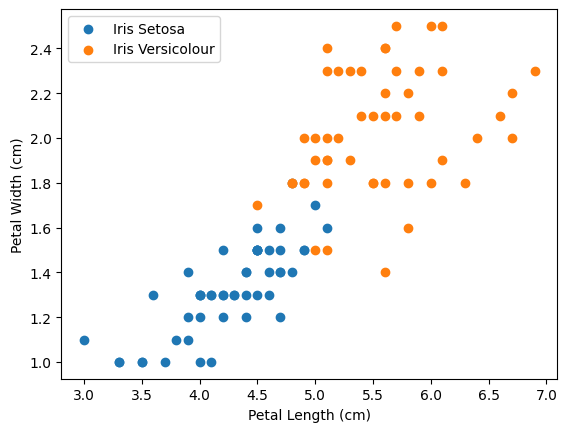

In [85]:
#Separate the dataset in the two classes, you can use the numpy function argsort and unique to do this.  
X = Data[:, :-1]  # feature values
y = Data[:, -1]   # class labels
# Divide the dataset by class
class0 = X[y == 0]
class1 = X[y == 1]

# class0 = np.where(Data[:,-1] == 0)
# class1 = np.where(Data[:,-1] == 1)
# class0 = np.where(Data[:,-1] == 0)
# class1 = np.where(Data[:,-1] == 1)
# class0X = Data[class0[:, :-1]]
# class1X = Data[class1[:, :-1]]
# class0Y = Data[class0X, -1]
# class1Y = Data[class1X, -1]

#Draw the scatter plot of the two classes on the same image
# Scatter plot
plt.scatter(class0[:, 0], class0[:, 1], label='Iris Setosa')
plt.scatter(class1[:, 0], class1[:, 1], label='Iris Versicolour')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

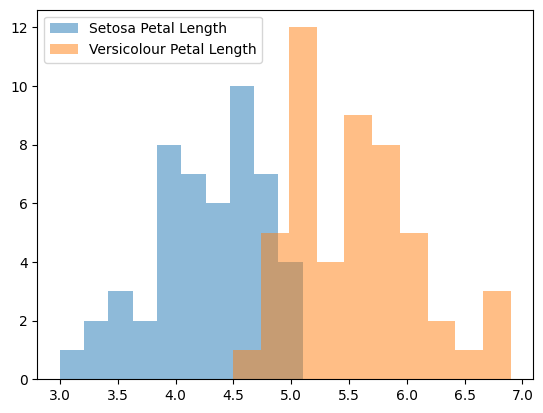

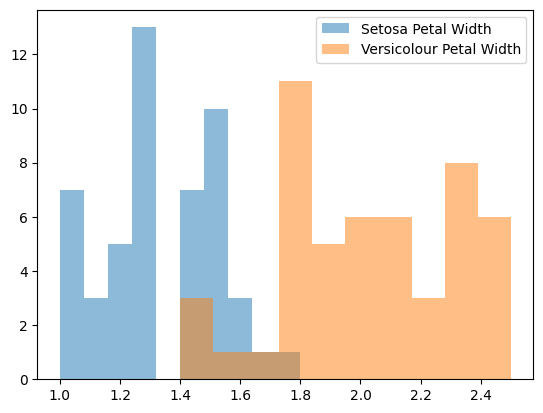

In [4]:
#Visualize the histogram of petal length and petal width (use e.g. the plt.hist() function)
# Histograms
plt.hist(class0[:, 0], alpha=0.5, label='Setosa Petal Length')
plt.hist(class1[:, 0], alpha=0.5, label='Versicolour Petal Length')
plt.legend()
plt.show()

plt.hist(class0[:, 1], alpha=0.5, label='Setosa Petal Width')
plt.hist(class1[:, 1], alpha=0.5, label='Versicolour Petal Width')
plt.legend()
plt.show()

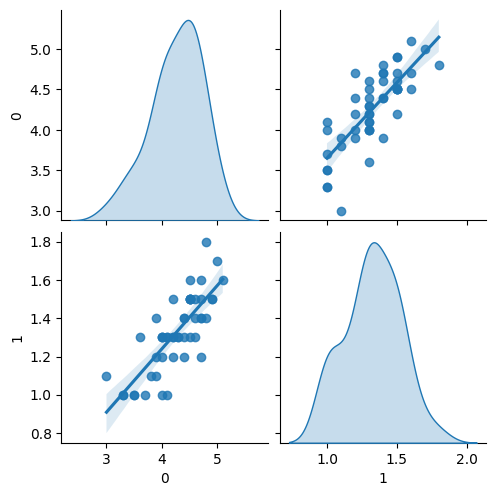

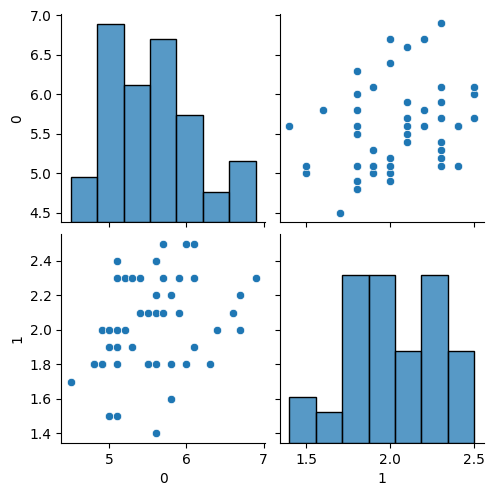

In [5]:
import seaborn as sns
import pandas as pd
sns.pairplot(pd.DataFrame(class0), kind='reg', diag_kind='kde')
sns.pairplot(pd.DataFrame(class1))

In [6]:
class0.shape
class1.shape
class0.mean(axis=0)
class1.mean(axis=0)

array([5.552, 2.026])

In [7]:
# print(class0)

In [90]:
#Calculate mean and covariance matrix under a multivariate Gaussian model. Scalar products can be computed with the function np.matmul()
#The transpose can be obtained with the function np.transpose 
#To make a scalar product between arrays in the form [Mx1]x[1xM] starting from 1D array A it may be necessary to add a new axis using the function A[:,np.newaxis]

covClass0 =  np.matmul(np.transpose(class0 - class0.mean(axis=0)), class0 - class0.mean(axis=0)) / class0.shape[0]
covClass1 =  np.matmul(np.transpose(class1 - class1.mean(axis=0)), class1 - class1.mean(axis=0)) / class1.shape[0]

setosa_mean = np.mean(class0, axis=0)
setosa_cov = np.cov(class0.T)
versicolour_mean = np.mean(class1, axis=0)
versicolour_cov = np.cov(class1.T)
print('Setosa Mean:', setosa_mean)
print('Versicolour Mean:', versicolour_mean)

print('Setosa Covariance:', setosa_cov)
print('Versicolour Covariance:', versicolour_cov)

print('Covariance matrix for class 0:', covClass0)
print('Covariance matrix for class 1:', covClass1)


Setosa Mean: [4.26  1.326]
Versicolour Mean: [5.552 2.026]
Setosa Covariance: [[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
Versicolour Covariance: [[0.30458776 0.04882449]
 [0.04882449 0.07543265]]
Covariance matrix for class 0: [[0.2164   0.07164 ]
 [0.07164  0.038324]]
Covariance matrix for class 1: [[0.298496 0.047848]
 [0.047848 0.073924]]


(50, 2)


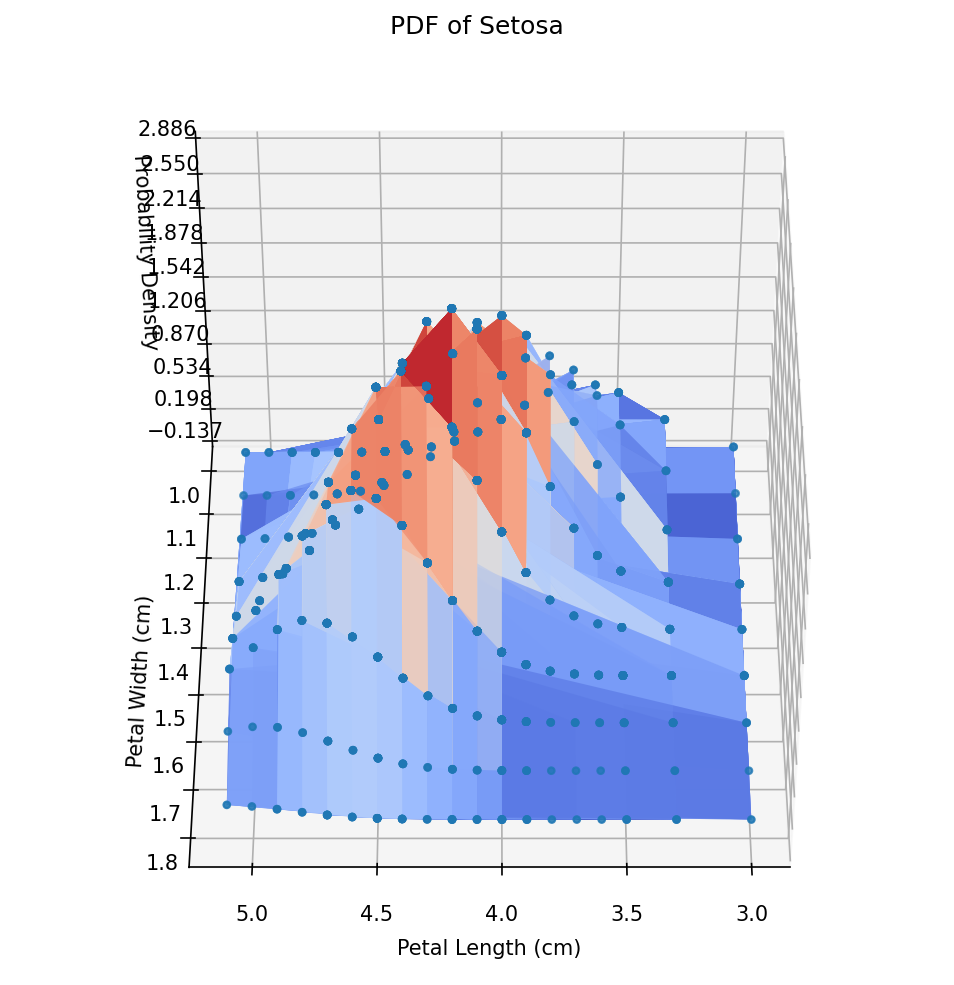

(2500, 2)
(50, 2)


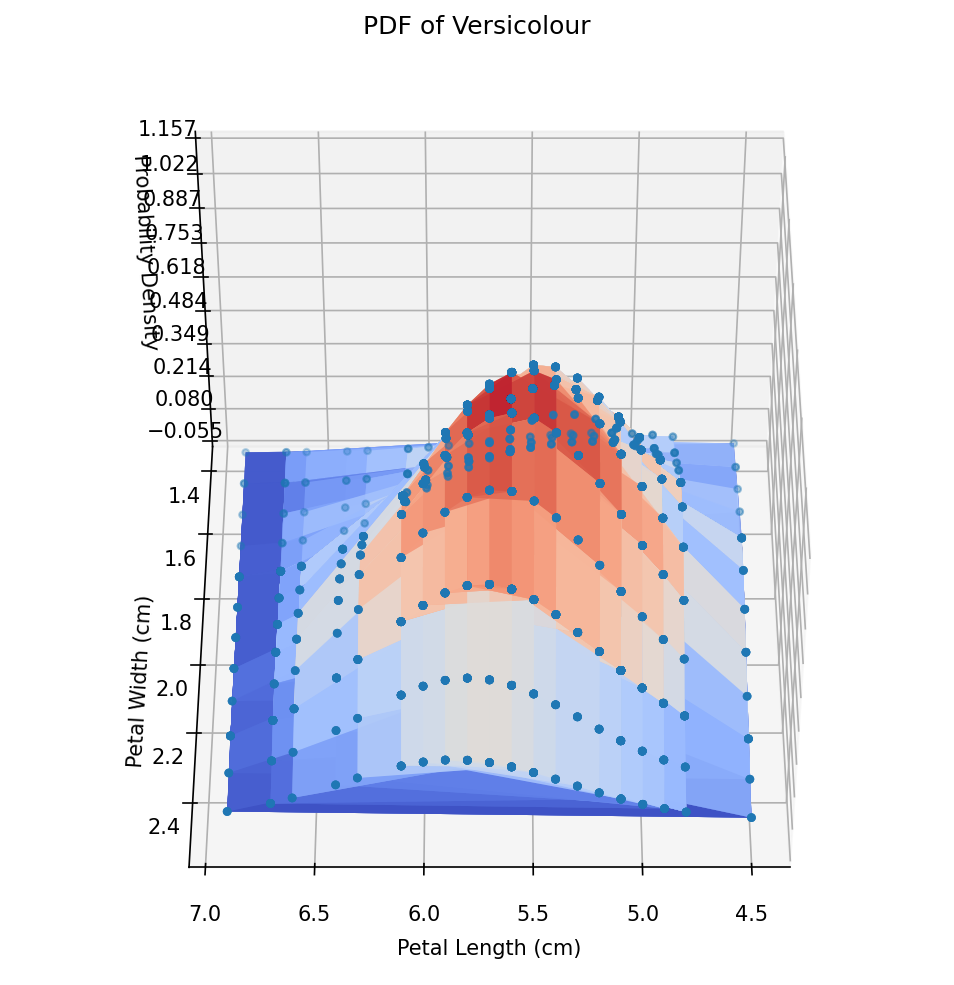

(2500, 2)


In [100]:
#Visualize the 2-D joint pdf of petal length and width, a pdf function can be initialized by providing mean and covariance matrix
from scipy.stats import multivariate_normal
from matplotlib import cm
from matplotlib.ticker import LinearLocator

pdf_class0 = multivariate_normal(mean=setosa_mean, cov=setosa_cov)
pdf_class1 = multivariate_normal(mean=versicolour_mean, cov=versicolour_cov)

#now manually calculating the multi-variate normal distribution
# def multivariate_normal_pdf(x, mean, cov):
#     n = mean.shape[0]
#     det = np.linalg.det(cov)
#     inv = np.linalg.inv(cov)
#     norm_const = 1.0 / (np.power((2 * np.pi), n / 2) * np.power(det, 0.5))
#     x_mu = x - mean
#     result = np.exp(-0.5 * (x_mu @ inv @ x_mu.T))
#     return norm_const * result

# pdf_class0 = multivariate_normal_pdf(class0, setosa_mean, setosa_cov)
# pdf_class1 = multivariate_normal_pdf(class1, versicolour_mean, versicolour_cov)

# #now we calculate pdf of the class0 and class1 from scratch
# def plotter(pdfff, data, title):
#     X = data[:, 0]
#     Y = data[:, 1]

#     X, Y = np.meshgrid(X, Y)
#     X_flat = X.flatten()
#     Y_flat = Y.flatten()
#     XY_list = np.concatenate((X_flat[:,np.newaxis],Y_flat[:,np.newaxis]),axis=1)
#     PDF_values = np.reshape(pdfff, np.shape(X))

#     fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(8, 8), dpi=150)
#     ax.plot_surface(X, Y, PDF_values, cmap=cm.coolwarm, alpha=0.7, linewidth=0)
#     plt.title('PDF of ' + title)
#     plt.xlabel('Petal Length (cm)')
#     plt.ylabel('Petal Width (cm)')
#     ax.set_zlabel('Probability Density')
#     ax.zaxis.set_major_locator(LinearLocator(10))
#     ax.view_init( 45, 90)
#     ax.scatter3D(X_flat, Y_flat, PDF_values, s=10)
#     plt.show()

# plotter(pdf_class0, class0, 'Setosa')
# plotter(pdf_class1, class1, 'Versicolour')

#Create a grid of x and y values on which to sample the pdf, this is done by providing a list of x-y of coordinates to the function pdf_class0.pdf(...)
#A 3D view of the pdf can be obtained using the function ax.plot_surface

#Code Example:

def plotter(pdfff, data, title):
    print(data.shape)
    X = data[:, 0]
    Y = data[:, 1]

    X, Y = np.meshgrid(X, Y)
    X_flat = X.flatten()
    Y_flat = Y.flatten()
    XY_list = np.concatenate((X_flat[:,np.newaxis],Y_flat[:,np.newaxis]),axis=1)
    PDF_values = np.reshape(pdfff.pdf(XY_list), np.shape(X))

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(8, 8), dpi=150)
    ax.plot_surface(X, Y, PDF_values, cmap=cm.coolwarm, alpha=0.7, linewidth=0)
    plt.title('PDF of ' + title)
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    ax.set_zlabel('Probability Density')
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.view_init( 45, 90)
    ax.scatter3D(X_flat, Y_flat, PDF_values, s=10)
    plt.show()
    print(XY_list.shape)

plotter(pdf_class0, class0, 'Setosa')
plotter(pdf_class1, class1, 'Versicolour')


#To change the orientation of the 3D plot the function ax.view_init(), for a view from above select ax.view_init( 90, 0)
#After visualizing the pdf you can plot the points of the dataset on the estimated pdf using ax.scatter3D()
#For a better visualization of the points we suggest to make the pdf plot semi-transparent using the alpha parameter
#Code Example: 
# PDF_points_class0 = pdf_class0.pdf(Features_class0)
#ax.scatter3D(Points_Class0_Feature0, Points_Class0_Feature1, PDF_points_class0, s=10)
#Note: the sample code was written only for class 0 but two plots have to be done, one for class 0 and one for class 1
#Note 2: the content of variables like Features_class0, Points_Class0_Feature0, Points_Class0_Feature1 should be substituted with variables created by the student

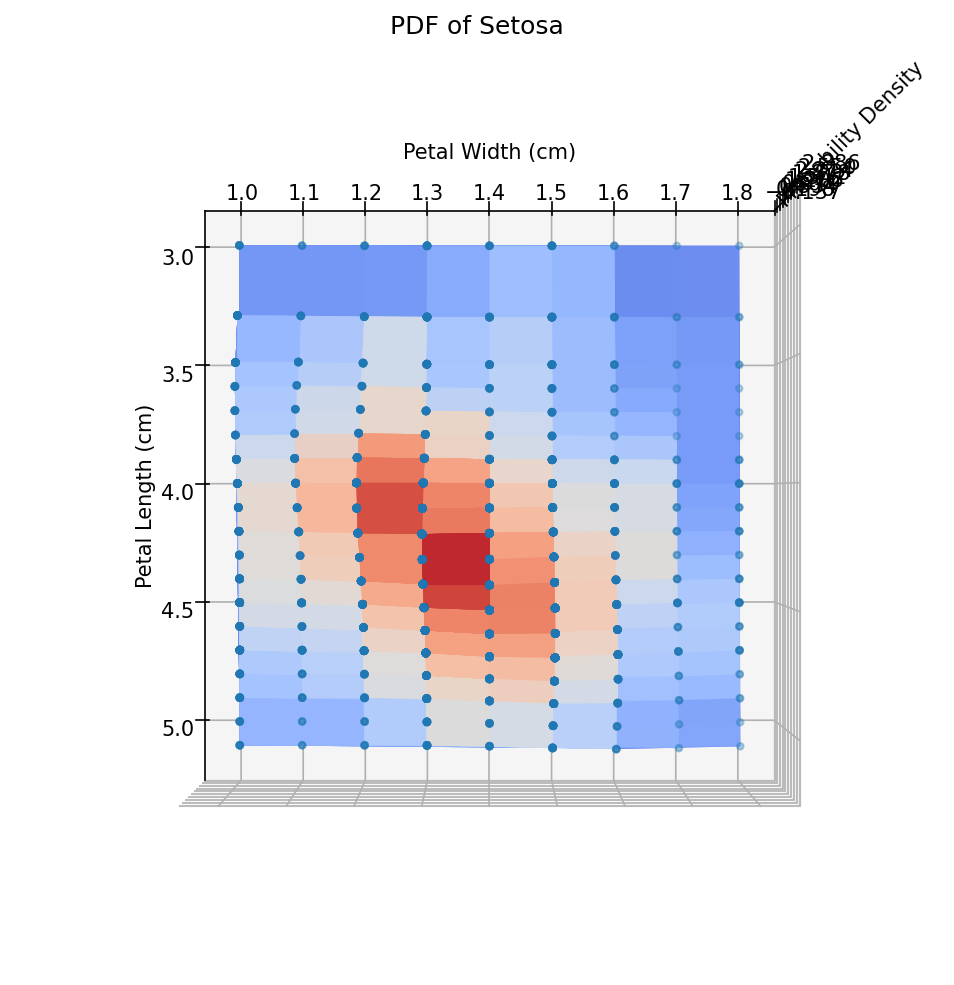

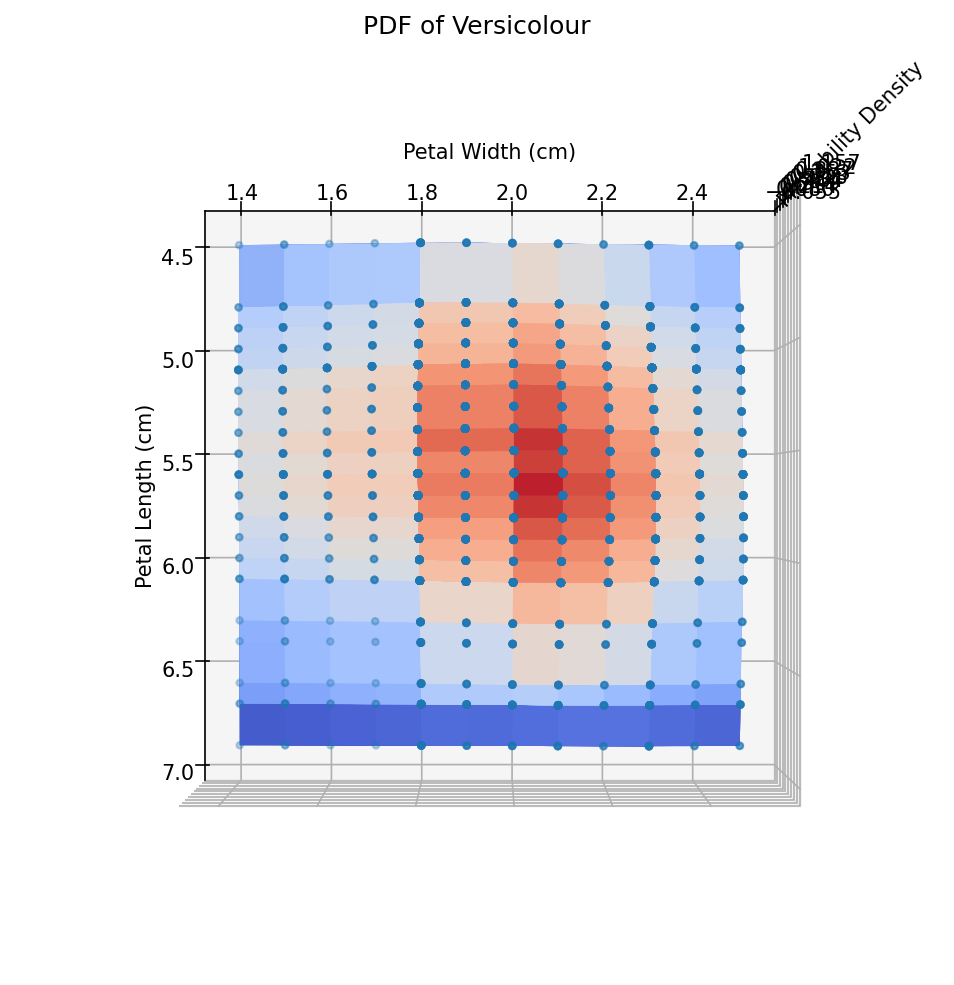

In [101]:
#Visualize the 2-D joint pdf of petal length and width, a pdf function can be initialized by providing mean and covariance matrix
from scipy.stats import multivariate_normal
from matplotlib import cm
from matplotlib.ticker import LinearLocator

pdf_class0 = multivariate_normal(mean=setosa_mean, cov=setosa_cov)
pdf_class1 = multivariate_normal(mean=versicolour_mean, cov=versicolour_cov)

#Create a grid of x and y values on which to sample the pdf, this is done by providing a list of x-y of coordinates to the function pdf_class0.pdf(...)
#A 3D view of the pdf can be obtained using the function ax.plot_surface

#Code Example:

def plotter(pdfff, data, title):
    X = data[:, 0]
    Y = data[:, 1]

    X, Y = np.meshgrid(X, Y)
    X_flat = X.flatten()
    Y_flat = Y.flatten()
    XY_list = np.concatenate((X_flat[:,np.newaxis],Y_flat[:,np.newaxis]),axis=1)
    PDF_values = np.reshape(pdfff.pdf(XY_list), np.shape(X))

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(8, 8), dpi=150)
    ax.plot_surface(X, Y, PDF_values, cmap=cm.coolwarm, alpha=0.7, linewidth=0)
    plt.title('PDF of ' + title)
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    ax.set_zlabel('Probability Density')
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.view_init( 90, 0)
    ax.scatter3D(X_flat, Y_flat, PDF_values, s=10)
    plt.show()

plotter(pdf_class0, class0, 'Setosa')
plotter(pdf_class1, class1, 'Versicolour')


#To change the orientation of the 3D plot the function ax.view_init(), for a view from above select ax.view_init( 90, 0)
#After visualizing the pdf you can plot the points of the dataset on the estimated pdf using ax.scatter3D()
#For a better visualization of the points we suggest to make the pdf plot semi-transparent using the alpha parameter
#Code Example: 
# PDF_points_class0 = pdf_class0.pdf(Features_class0)
#ax.scatter3D(Points_Class0_Feature0, Points_Class0_Feature1, PDF_points_class0, s=10)
#Note: the sample code was written only for class 0 but two plots have to be done, one for class 0 and one for class 1
#Note 2: the content of variables like Features_class0, Points_Class0_Feature0, Points_Class0_Feature1 should be substituted with variables created by the student

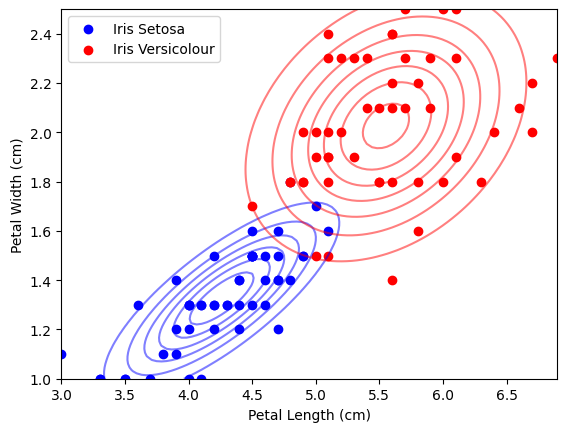

In [11]:
x, y = np.meshgrid(np.linspace(min(class0[:, 0].min(), class1[:, 0].min()),
                               max(class0[:, 0].max(), class1[:, 0].max()), 100),
                   np.linspace(min(class0[:, 1].min(), class1[:, 1].min()),
                               max(class0[:, 1].max(), class1[:, 1].max()), 100))

pos = np.dstack((x, y))
pdf_setosa = multivariate_normal.pdf(pos, setosa_mean, setosa_cov)
pdf_versicolour = multivariate_normal.pdf(pos, versicolour_mean, versicolour_cov)

plt.contour(x, y, pdf_setosa, colors='blue', alpha=0.5)
plt.contour(x, y, pdf_versicolour, colors='red', alpha=0.5)
plt.scatter(class0[:, 0], class0[:, 1], color='blue', label='Iris Setosa')
plt.scatter(class1[:, 0], class1[:, 1], color='red', label='Iris Versicolour')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

**Student's comments to Exercise 1**

*Add comments to the results of Exercise 1 here (may use LateX for formulas if needed).*

**Exercise 2 - Model fitting for discrete distributions: Bag of Words**


In this exercise, you will employ a real dataset (file *SMSSpamCollection*). The SMS Spam Collection v.1 (https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset) is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.
Task: you have to fit the parameters employed by a Naïve Bayes Classifier, using a Bernoulli model. Under this model, the parameters are:

*   $\pi_{c}$, the prior probabilities of each class.
*   $\theta_{jc}$, the probability that feature j is equal to 1 in class c.

Model fitting can be done using the pseudocode at the end of the Lecture 3 slides.

Display the class-conditional densities $\theta_{jc1}$ and $\theta_{jc2}$. Try to identify “uninformative” features (i.e., features j such that $\theta_{jc1}$ ≃ $\theta_{jc2}$).

In [115]:
# this is a bad day
# pham = 0.6
# pspam= 0.4

# p(this|ham) = 0.2
# p(is|ham) = 0.1
# p(a|ham) = 0.3
# p(bad|ham) = 0.1
# p(day|ham) = 0.3
# p(this|spam) = 0.9
# p(is|spam) = 0.1
# p(a|spam) = 0.1
# p(bad|spam) = 0.0


# p(ham|this is a bad day) = p(this|ham) * p(is|ham) * p(a|ham) * p(bad|ham) * p(day|ham) * pham
# p(spam|this is a bad day) = p(this|spam) * p(is|spam) * p(a|spam) * p(bad|spam) * p(day|spam) * pspam
#probability of presence of a word in a test document given the class, the formula is the following:
# p(word|class) = (number of documents in the class containing the word + 1) / (number of documents in the class + 2)
# theta*p(word|class) + (1-theta)*p(word|class)
#theta is the probality of the word being present in the class and 1-theta is the probability of the word being present in the class

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# reading the data
data = pd.read_csv("SMSSpamCollection", encoding="ISO-8859-1", sep="\t", header=None)
data.rename(columns={0: "labels", 1: "text"}, inplace=True)
display(data)

# Transform data to bag of word representation
#Featurenames look like this: ['aa', 'aah', 'aaniye', 'aaooooright', 'aathilove', 'ab', 'abbey', 'abdomen', 'abeg', 'abel']
#The bag of word representation is a matrix where each row is a document and each column is a word and it lloks like the following:
# 0 1 0 0 0 0 0 0 0 0
# 0 1 1 1 0 0 0 0 0 0
bagger = CountVectorizer(
    max_features=2500,
    binary=True,  # Bernulli Model, this helps to remove the frequency of the word and only consider if the word is present or not in the document
    token_pattern=r"(?u)\b[a-zA-Z][a-zA-Z]+\b",
)
bag = bagger.fit_transform(data["text"]).toarray()
feature_names = bagger.get_feature_names_out()

data = pd.concat([data, pd.DataFrame(bag, columns=feature_names)], axis=1)
display(data)
X_train = data.iloc[:3000,2:].to_numpy()
X_test = data.iloc[3000:,2:].to_numpy()
y_train = data.iloc[:3000,0].to_numpy() == 'ham'
y_test = data.iloc[3000:,0].to_numpy() == 'ham'

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


,labels,text,aah,aathi,abi,abiola,able,about,abt,abta,...,you,your,yours,yourself,yr,yrs,yummy,yun,yup,zed
0,ham,"Go until jurong point, crazy.. Available only ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,Ok lar... Joking wif u oni...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,U dun say so early hor... U c already then say...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,ham,Will Ã¼ b going to esplanade fr home?,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,ham,The guy did some bitching but I acted like i'd...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# from google.colab import drive
# drive.mount('/content/drive')

P(Spam): 0.13406317300789664
P(Ham): 0.8659368269921034


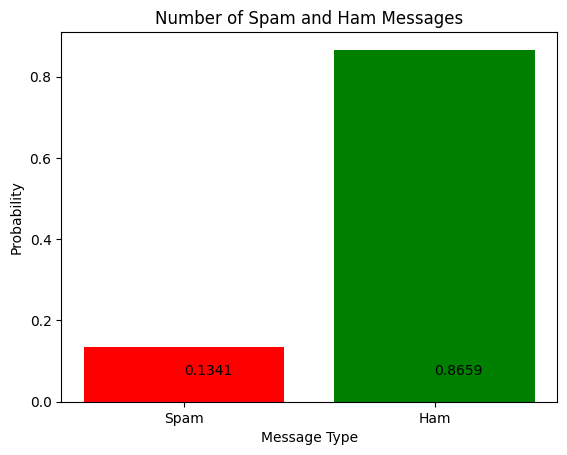

In [14]:
#Evaluate the probabilities of the two classes, and the class conditional densities.
n_spam = np.sum(data['labels'] == 'spam')
n_ham = np.sum(data['labels'] == 'ham')
n_total = len(data)
prior_spam = n_spam / n_total
prior_ham = n_ham / n_total
print('P(Spam):', prior_spam)
print('P(Ham):', prior_ham)

#plot the bar plot of the two classes with two colors
#write the value inside the bars
plt.bar(['Spam', 'Ham'], [prior_spam, prior_ham], color=['red', 'green'])
plt.text(0, prior_spam/2, str(prior_spam.round(4)))
plt.text(1, prior_spam/2, str(prior_ham.round(4)))
plt.xlabel('Message Type')
plt.ylabel('Probability')
plt.title('Number of Spam and Ham Messages')
plt.show()


In [15]:
#What is the probability of the word "free" given the class spam and ham?
# p(word|class) = (number of documents in the class containing the word + 1) / (number of documents in the class + 2)
# theta*p(word|class) + (1-theta)*p(word|class)
#theta is the probality of the word being present in the class and 1-theta is the probability of the word being Absent in the class
#we count the number of occurences of the word in the class and divide by the number of documents in the class
#we add 1 to the numerator and 2 to the denominator to avoid division by zero and add-one smoothing
Njc_class0 = [np.sum(X_train[y_train == 0][:, i]) for i in range(X_train.shape[1])]
Njc_class1 = [np.sum(X_train[y_train == 1][:, i]) for i in range(X_train.shape[1])]

In [16]:
theta_class0 = np.array(Njc_class0) / np.sum(Njc_class0)
theta_class1 = np.array(Njc_class1) / np.sum(Njc_class1)

In [117]:
#uninformative features are those that have zero probability in both classes and informative features are those that have non-zero probability in at least one class
uninformative_features = np.where((theta_class0 == 0) & (theta_class1 == 0))[0] #where both classes have zero probability
print('Uninformative Features:', uninformative_features.shape)
informative_features = np.where((theta_class0 != 0) | (theta_class1 != 0))[0] #where at least one class has non-zero probability
print('Informative Features:', informative_features.shape)

Uninformative Features: (60,)
Informative Features: (2440,)


In [18]:
print('Number of Uninformative Features:', len(uninformative_features))
print('Uninformative Features:', uninformative_features)

print('Number of Informative Features:', len(informative_features))
print('Informative Features:', informative_features)

print('Njc Class 0:', Njc_class0)
print('Theta Class 0:', theta_class0)

print('Njc Class 1:', Njc_class1)
print('Theta Class 1:', theta_class1)

Number of Uninformative Features: 60
Uninformative Features: [  12   33  139  150  153  177  231  242  247  300  302  318  353  423
  433  437  528  567  606  620  729  766  793  894  942  987 1032 1132
 1183 1189 1227 1254 1307 1382 1402 1510 1526 1579 1611 1626 1633 1647
 1651 1684 1726 1853 1940 2014 2090 2120 2163 2166 2190 2264 2299 2340
 2367 2411 2449 2459]
Number of Informative Features: 2440
Informative Features: [   0    1    2 ... 2497 2498 2499]
Njc Class 0: [0, 0, 0, 0, 0, 7, 0, 2, 6, 0, 0, 2, 0, 0, 0, 9, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 4, 7, 0, 2, 0, 0, 1, 0, 0, 1, 0, 3, 0, 0, 2, 0, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 17, 0, 0, 3, 1, 1, 0, 0, 2, 0, 0, 6, 1, 0, 1, 0, 0, 0, 9, 71, 0, 3, 0, 4, 4, 5, 0, 0, 0, 7, 0, 0, 1, 0, 0, 5, 0, 0, 0, 0, 0, 2, 0, 14, 0, 0, 0, 0, 0, 0, 1, 0, 38, 5, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 3, 0, 0, 18, 6, 0, 0, 1, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 13, 0, 5, 0, 1, 0, 0, 2, 0, 1, 0, 10, 3, 0, 10, 19, 2, 0, 3, 1, 1, 13, 0, 0, 

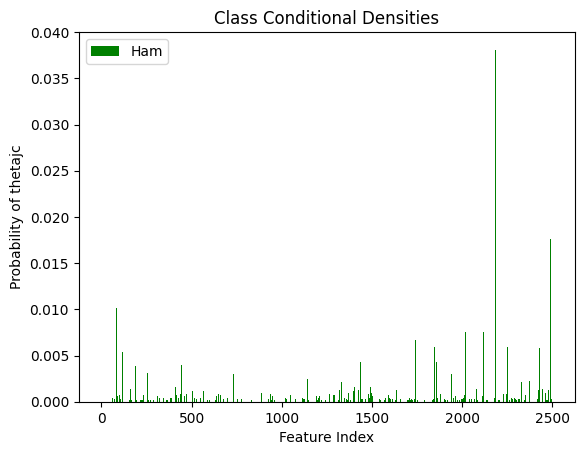

In [119]:
#Display the class-conditional densities θjc1 and θjc2.
#Use the function plt.bar() to plot the bar plot of the class conditional densities for the first 10 features
#Write the value inside the bars
# plt.bar(range(len(theta_class0)), theta_class0, color='red', label='Spam', width=1)
plt.bar(range(len(theta_class1)), theta_class0, color='green', label='Ham', width=1)#put Njc_class0 to see the number of occurences
plt.xlabel('Feature Index')
plt.ylabel('Probability of thetajc')
plt.title('Class Conditional Densities')
plt.legend()
plt.show()


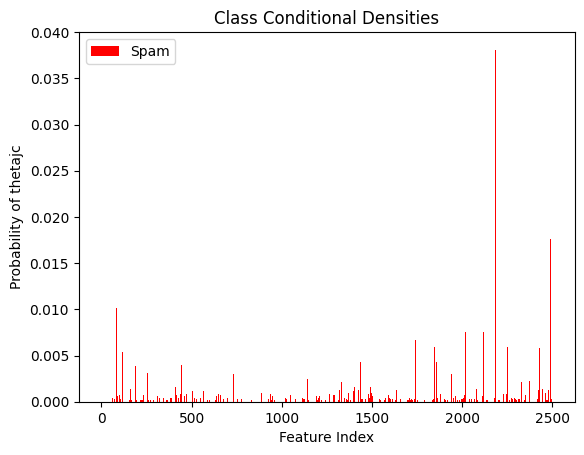

In [20]:
plt.bar(range(len(theta_class0)), theta_class0, color='red', label='Spam', width=1)
# plt.bar(range(len(theta_class1)), theta_class1, color='green', label='Ham', width=1)
plt.xlabel('Feature Index')
plt.ylabel('Probability of thetajc')
plt.title('Class Conditional Densities')
plt.legend()
plt.show()

**Student's comments to Exercise 2**

*Add comments to the results of Exercise 2 here (may use LateX for formulas if needed).*

**Exercise 3 - Classification – discrete data**

In this exercise, you will design a Naïve Bayes Classifier (NBC) for the Bag of Words (BoW) features for document classification that have been prepared in *Exercise 2*. In particular, in *exercise 2*, you have already estimated the following parameters:


*   The prior probabilities of each class, $\pi_{c} = p(y=c)$.
*   The class-conditional probabilities of each feature, $\theta_{jc} = p(x_{j}=1 | y=c)$.

These parameters have been estimated from the training data. In this exercise, you will use the test data, and classify each test vector using an NBC whose model has been fitted in *Exercise 2*. In particular, you will do the following:



*   For each test vector, calculate the MAP estimate of the class the test vector belongs to. Remember: the MAP classifier chooses the class that maximizes $\mathop{\max\limits_c{\log p(y=c|x)} \propto \log p(x|y=c)} + \log p(c)$. In the NBC, the features (i.e. each entry of $x$) are assumed to be statistically independent, so $p(x|y=c) = \prod_{j=1}^{D}p(x_{j}|y=c)$. This formula allows you to calculate $p(x|y=c)$ for a given test vector $x$ using the parameters $\theta_{jc}$ already calculated in *Exercise 2*. Note that, after the logarithm, the product 
becomes a summation. It is much better to use the logarithm in order to avoid underflow.
*   See how the accuracy changes when the prior is not taken into account (e.g. by comparing the MLE and MAP estimate).
*   After classifying a test vector using the NBC, the obtained class can be compared with the truth (vector *ytest*).
*   The accuracy of the classifier can be computed as the percentage of times that the NBC provides the correct class for a test vector.
*   Repeat the same operations using the training data as test data, and compare the accuracy of the classifier on the training and test data.
*   Note: It is expected that students implement the Naive Bayes classifier from scratch without using pre-made functions such as sklearn.naive_bayes

**Optional:**

If you plot the class-conditional densities as done at the end of Exercise 2, you will see that many features are uninformative; e.g., words that appear very often (or very rarely) in documents belonging to either class are not very helpful to classify a document. The NBC can perform a lot better if these uninformative features are disregarded during the classification, i.e. only a subset of the features, chosen among the most informative ones, are retained. To rank the features by “significance”, one can employ the mutual information between feature $x_{j}$ and class $y$ (see Sec. 3.5.4 of the textbook):

\begin{align*}
I(X,Y) = \sum_{xj} \sum_{y}p(x_{j},y) \log \frac{p(x_{j},y)}{p(x_{j})p(y)}
\end{align*}

For binary features, the mutual information of feature j can be written as:

\begin{align*}
I_{j} = \sum_{c} \left[\theta_{jc}\pi_{c}\log \frac{\theta_{jc}}{\theta_{j}}+ (1 - \theta_{jc})\pi_{c} \log \frac{1 - \theta_{jc}}{1 - \theta_{j}}\right]
\end{align*}

with $\theta_{j}=p(x_{j}=1)=\sum_{c}\pi_{c}\theta_{jc}$. For this part, you should:


*   Calculate $I_{j}$ for all features. Note: try to avoid divisions by zero adding the machine precision constant *eps* to the denominators.
*   Rank the features by decreasing values of $I_{j}$, and keep only the $K$ most important ones.

*    Run the classifier employing only the $K$ most important features, and calculate the accuracy.

*    Plot the accuracy as a function of $K$.

In [21]:
#Evaluate the MAP on the test set
# ham is 0 and spam is 1
MAP_Sentence0 = []
MAP_Sentence1 = []
MAP_Sentence_i_0 = 0
MAP_Sentence_i_1 = 0
for i in range(len(X_test)):
    Pxj0 = 1
    Pxj1 = 1
    for j in range(len(X_test[i])):
        if X_test[i][j] == 1:
            if theta_class0[j] != 0: # this is because we have not done the add-one smoothing
                Pxj0 *= theta_class0[j]
            if theta_class1[j] != 0:
                Pxj1 *= theta_class1[j]
    MAP_Sentence_i_0 = np.log(prior_ham) + np.log(Pxj0) # this is MAP estimation since we are using the log(prior) + log(likelihood)
    MAP_Sentence_i_1 = np.log(prior_spam) + np.log(Pxj1)
    MAP_Sentence0.append(MAP_Sentence_i_0)
    MAP_Sentence1.append(MAP_Sentence_i_1)

y_pred = []
for i in range(len(MAP_Sentence0)):
    if abs(MAP_Sentence0[i]) > abs(MAP_Sentence1[i]):
        y_pred.append(0)
    else:
        y_pred.append(1)

y_pred = np.array(y_pred)
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print('Accuracy:', accuracy)


Accuracy: 0.8615863141524106


In [22]:
#Evaluate the MAP on the test set without prior probabilities
MAP_Sentence0 = []
MAP_Sentence1 = []
MAP_Sentence_i_0 = 0
MAP_Sentence_i_1 = 0
for i in range(len(X_test)):
    Pxj0 = 1
    Pxj1 = 1
    for j in range(len(X_test[i])):
        if X_test[i][j] == 1:
            if theta_class0[j] != 0:
                Pxj0 *= theta_class0[j]
            if theta_class1[j] != 0:
                Pxj1 *= theta_class1[j]
    MAP_Sentence_i_0 =  np.log(Pxj0)
    MAP_Sentence_i_1 =  np.log(Pxj1)
    MAP_Sentence0.append(MAP_Sentence_i_0)
    MAP_Sentence1.append(MAP_Sentence_i_1)

y_pred = []
for i in range(len(MAP_Sentence0)):
    if abs(MAP_Sentence0[i]) > abs(MAP_Sentence1[i]):
        y_pred.append(0)
    else:
        y_pred.append(1)

y_pred = np.array(y_pred)
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print('Accuracy:', accuracy)


Accuracy: 0.8409797822706065


In [23]:
#Evaluate the MAP on Training Set
MAP_Sentence0 = []
MAP_Sentence1 = []
MAP_Sentence_i_0 = 0
MAP_Sentence_i_1 = 0
for i in range(len(X_train)):
    Pxj0 = 1
    Pxj1 = 1
    for j in range(len(X_train[i])):
        if X_train[i][j] == 1:
            if theta_class0[j] != 0:
                Pxj0 *= theta_class0[j]
            if theta_class1[j] != 0:
                Pxj1 *= theta_class1[j]
    MAP_Sentence_i_0 = np.log(prior_ham) + np.log(Pxj0)
    MAP_Sentence_i_1 = np.log(prior_spam) + np.log(Pxj1)
    MAP_Sentence0.append(MAP_Sentence_i_0)
    MAP_Sentence1.append(MAP_Sentence_i_1)

y_pred = []
for i in range(len(MAP_Sentence0)):
    if abs(MAP_Sentence0[i]) > abs(MAP_Sentence1[i]):
        y_pred.append(0)
    else:
        y_pred.append(1)

y_pred = np.array(y_pred)
y_train = y_train.astype(int)
y_pred = y_pred.astype(int)
accuracy = np.sum(y_pred == y_train) / len(y_train)
print('Accuracy:', accuracy)


Accuracy: 0.8826666666666667


In [24]:
#Evaluate the MLE on the test set
#MAP withou prior probabilities is the same as MLE
MLE_Sentence0 = []
MLE_Sentence1 = []
MLE_Sentence_i_0 = 0
MLE_Sentence_i_1 = 0

for i in range(len(X_test)):
    Pxj0 = 1
    Pxj1 = 1
    for j in range(len(X_test[i])):
        if X_test[i][j] == 1:
            if theta_class0[j] != 0:
                Pxj0 *= theta_class0[j]
            if theta_class1[j] != 0:
                Pxj1 *= theta_class1[j]
    MLE_Sentence_i_0 = np.log(Pxj0)
    MLE_Sentence_i_1 = np.log(Pxj1)
    MLE_Sentence0.append(MLE_Sentence_i_0)
    MLE_Sentence1.append(MLE_Sentence_i_1)

y_pred = []
for i in range(len(MLE_Sentence0)):
    if abs(MLE_Sentence0[i]) <= abs(MLE_Sentence1[i]):
        y_pred.append(1)
    else:
        y_pred.append(0)

y_pred = np.array(y_pred)
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print('Accuracy:', accuracy)

Accuracy: 0.8409797822706065


In [25]:
#Evaluate the MLE on the trianing set
#MAP withou prior probabilities is the same as MLE
MLE_Sentence0 = []
MLE_Sentence1 = []
MLE_Sentence_i_0 = 0
MLE_Sentence_i_1 = 0

for i in range(len(X_train)):
    Pxj0 = 1
    Pxj1 = 1
    for j in range(len(X_train[i])):
        if X_train[i][j] == 1:
            if theta_class0[j] != 0:
                Pxj0 *= theta_class0[j]
            if theta_class1[j] != 0:
                Pxj1 *= theta_class1[j]
    MLE_Sentence_i_0 = np.log(Pxj0)
    MLE_Sentence_i_1 = np.log(Pxj1)
    MLE_Sentence0.append(MLE_Sentence_i_0)
    MLE_Sentence1.append(MLE_Sentence_i_1)

y_pred = []
for i in range(len(MLE_Sentence0)):
    if abs(MLE_Sentence0[i]) <= abs(MLE_Sentence1[i]):
        y_pred.append(1)
    else:
        y_pred.append(0)

y_pred = np.array(y_pred)
y_train = y_train.astype(int)
y_pred = y_pred.astype(int)
accuracy = np.sum(y_pred == y_train) / len(y_train)
print('Accuracy:', accuracy)

Accuracy: 0.8686666666666667


**Student's comments to Exercise 3**

*Add comments to the results of Exercise 3 here (may use LateX for formulas if needed).*

**Exercise 4 – Plotting the ROC curve**

For the discrete data classification problem of Exercise 3, analyse the performance of the classifier plotting the complete ROC curve, instead of simply measuring the accuracy. This requires to do the following.

*   Instead of classifying the documents choosing class 1 if $p(y=1|x)>p(y=2|x)$, now you can generalize this to choosing class 1 if $\frac{p(y=1|x)}{p(y=2|x)}>\tau \in [0, \infty)$ for some threshold $\tau$ that determines the compromise between true positive rate (TPR) and false positive rate (FPR). 
*   Choose a **reasonable** range of values for $\tau$. For each value of $\tau$, compute the TPR and FPR on the dataset (Hint: determine suitable minimum and maximum values for $\tau$, and sample densely enough in that range). 
* Plot a curve of TPR as a function of FPR – this is the ROC curve for this classifier.

*   Determine an estimate of the Equal Error Rate (EER), i.e. the point of the ROC curve such that TPR+FPR=1.

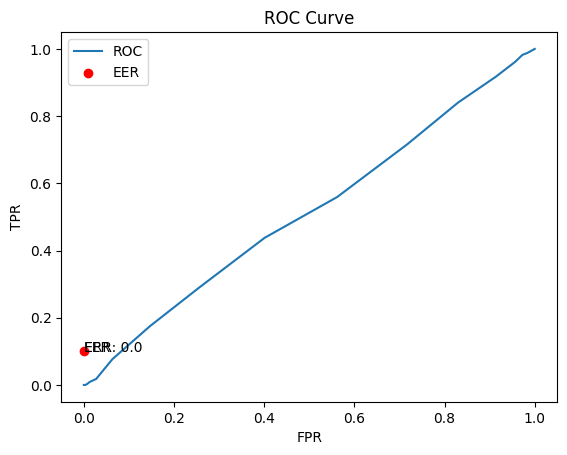

In [158]:

# #compute the ROC curve
def ROCEstimator(mapClass0, mapClass1, taw):
    y_pred_test_roc = []
    for i in range(len(mapClass0)):
        if np.abs(mapClass0[i]) / np.abs(mapClass1[i]) > taw:
            y_pred_test_roc.append(0)
        elif np.abs(mapClass0[i]) / np.abs(mapClass1[i]) < taw:
            y_pred_test_roc.append(1)
    return y_pred_test_roc

#compute accuracy, TPR, FPR and EER

def Accuracy(y, y_pred):
    return np.sum(y == y_pred) / len(y)

def TPR(y, y_pred):
    nTrue = 0
    nPos = 0
    for i in range(len(y)):
        if y[i] == 0 :
            nTrue += 1
            if y_pred[i] == 0:
                nPos += 1
    TPR = nPos / nTrue
    return TPR

def FPR(y, y_pred):
    nFalse = 0
    nNeg = 0
    for i in range(len(y)):
        if y[i] == 1 :
            nFalse += 1
            if y_pred[i] == 0:
                nNeg += 1
    FPR = nNeg / nFalse
    return FPR

def FNR(y, y_pred):
    nTrue = 0
    nNeg = 0
    for i in range(len(y)):
        if y[i] == 1 :
            nTrue += 1
            if y_pred[i] == 1:
                nNeg += 1
    FNR = nNeg / nTrue
    return FNR

taws = np.arange(0,15,0.1)
TPRs = []
FPRs = []
FNRs = []
ERRs = []
ERR_Points = []

for i in taws:
    y_pred_test_roc = ROCEstimator(MAP_Sentence0, MAP_Sentence1, i)
    TPRr = TPR(y_test, y_pred_test_roc)
    FPRr = FPR(y_test, y_pred_test_roc)
    FNRr = FNR(y_test, y_pred_test_roc)
    TPRs.append(TPRr)
    FPRs.append(FPRr)
    # if abs(FPRr[i] - (1 - TPRr[i])) < 1e-6:
    #     eer = (FPRr[i] + (1 - TPRr[i])) / 2
    #     ERRs.append(eer)
    #     ERR_Points.append(i)
    #find ERR Points where tpr_fp = 1
    if FNRr - FPRr < 0.05:
        ERRs.append(i)
        ERR_Points.append(i)


#plot the ROC curve
#show the point corresponding to the EER on the ROC curve
#show the value of ERR on the plot
plt.plot(FPRs, TPRs, label='ROC')
plt.scatter(ERR_Points[0], ERR_Points[1], color='red', label='EER')
plt.text(ERR_Points[0], ERR_Points[1], 'EER')
plt.text(ERR_Points[0], ERR_Points[1], 'ERR: ' + str(ERRs[0]))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Student's comments to Exercise 4**

*Add comments to the results of Exercise 4 here (may use LateX for formulas if needed).*

**Exercise 5 – Classification – continuous data**

This exercise employs the Iris dataset already employed in Exercise 1, and performs model fitting and classification using several versions of **Gaussian discriminative analysis**. However, for this exercise the available data have to be divided into two sets, namely *training* and *test* data. 

You will have to 1) re-fit the training data to the specific model (see below), 2) classify each of the test samples, and 3) calculate the accuracy of each classifier.

Classifiers to be employed:
*   Two-class quadratic discriminant analysis (fitting: both mean values and covariance matrices are class-specific – same as in exercise 1).
*   Two-class linear discriminant analysis (fitting: class-specific mean values as in the previous case. Shared covariance matrix is calculated putting together the elements of both classes; the mean values should also be recalculated accordingly).

In [161]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

Dataset1 = h5py.File("Lab2_Ex_1_Iris.hdf5")
Data = np.array(Dataset1.get('Dataset')) 

Train = Data[:50,:]
Test = Data[50:,:]

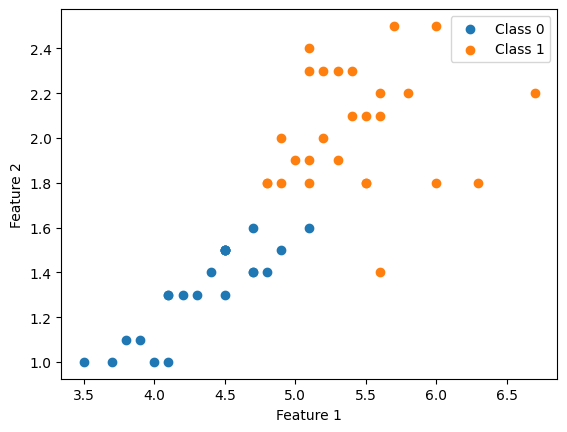

In [162]:
#create training and test set
X_train = Train[:,:-1]
y_train = Train[:,-1]
X_test = Test[:,:-1]
y_test = Test[:,-1]

#Separate the dataset in the two classes, you can use the numpy function argsort and unique to do this.
class0 = X_train[y_train == 0]
class1 = X_train[y_train == 1]

#Draw the scatter plot of the two classes on the same image
plt.scatter(class0[:,0], class0[:,1], label='Class 0')
plt.scatter(class1[:,0], class1[:,1], label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


QDA Accuracy: 0.94
LDA Accuracy: 0.9


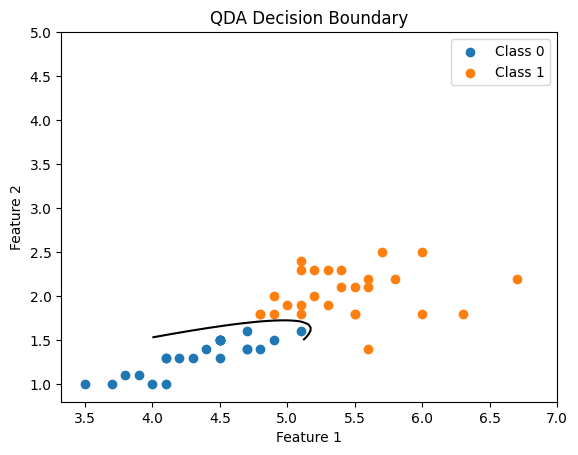

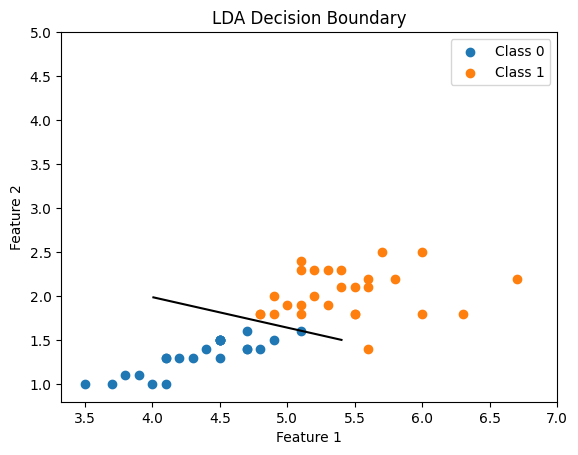

In [177]:
#calculate the mean and covariance matrix for each class
mean_class0 = np.mean(class0, axis=0)
mean_class1 = np.mean(class1, axis=0)
cov_class0 =  np.matmul(np.transpose(class0 - class0.mean(axis=0)), class0 - class0.mean(axis=0)) / class0.shape[0]
cov_class1 =  np.matmul(np.transpose(class1 - class1.mean(axis=0)), class1 - class1.mean(axis=0)) / class1.shape[0]

# cov_class0 = np.cov(class0.T)
# cov_class1 = np.cov(class1.T)

#quadradic discriminant Analysis (QDA) Function
# this is the formula for QDA: with log: -0.5 * log(det(cov)) - 0.5 * (x - mean) @ inv(cov) @ (x - mean) - x.shape[0] / 2 * log(2 * np.pi)
def QDA(x, mean, cov):
    return -0.5 * np.log(np.linalg.det(cov)) - 0.5 * (x - mean) @ np.linalg.inv(cov) @ (x - mean) - x.shape[0] / 2 * np.log(2 * np.pi)

#predict the class of the test set
y_pred = []
for i in range(len(X_test)):
    if QDA(X_test[i], mean_class0, cov_class0) > QDA(X_test[i], mean_class1, cov_class1):
        y_pred.append(0)
    else:
        y_pred.append(1)

#compute the accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test)
print('QDA Accuracy:', accuracy)

#using Linear Discriminant Analysis (LDA) Function
def LDA(x, mean, cov):
    return x @ np.linalg.inv(cov) @ mean - 0.5 * mean @ np.linalg.inv(cov) @ mean + np.log(0.5)

#predict the class of the test set
ldaMean = np.mean(X_train, axis=0)
ldaCov = np.cov(X_train.T)

y_pred = []
for i in range(len(X_test)):
    if LDA(X_test[i], mean_class0, ldaCov) > LDA(X_test[i], mean_class1, ldaCov):
        y_pred.append(0)
    else:
        y_pred.append(1)

#compute the accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test)
print('LDA Accuracy:', accuracy)

import matplotlib.pyplot as plt
import numpy as np

# Assuming class0 and class1 are lists
class0 = np.array(class0)
class1 = np.array(class1)


# Plot the decision boundary for QDA
# Scatter plot of the two classes
plt.scatter(class0[:, 0], class0[:, 1], label='Class 0')
plt.scatter(class1[:, 0], class1[:, 1], label='Class 1')

# Assuming mean_class0, cov_class0, mean_class1, cov_class1 are also lists
mean_class0 = np.array(mean_class0)
cov_class0 = np.array(cov_class0)
mean_class1 = np.array(mean_class1)
cov_class1 = np.array(cov_class1)

x = np.linspace(4, 7, 100)
y = np.linspace(1.5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        point = np.array([X[i, j], Y[i, j]])
        Z[i, j] = QDA(point, mean_class0, cov_class0) - QDA(point, mean_class1, cov_class1)

plt.contour(X, Y, Z, levels=0, colors='black')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('QDA Decision Boundary')
plt.show()
plt.clf()

#plot the scatter plot of the two classes
plt.scatter(class0[:,0], class0[:,1], label='Class 0')
plt.scatter(class1[:,0], class1[:,1], label='Class 1')



#plot the decision boundary for LDA
x = np.linspace(4, 7, 100)
y = np.linspace(1.5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i,j] = LDA([X[i,j], Y[i,j]], mean_class0, ldaCov) - LDA([X[i,j], Y[i,j]], mean_class1, ldaCov)
plt.contour(X, Y, Z, levels=0, colors='black')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('LDA Decision Boundary')
plt.show()


**Student's comments to Exercise 5**

*Add comments to the results of Exercise 5 here (may use LateX for formulas if needed).*

**Exercise 6 – Classification – continuous data**

Classify the data in the phoneme dataset from Lab. 1 using quadratic discriminant analysis, linear discriminat analysis and a Naive Bayes classifier. 

Compute the accuracy of each classifier and compare its performance with that of the k-nn classifier developed in Lab. 1.

Note: in Lab1 we had to employ a subset of the oiginal dataset due to the fact that k-nn has a quadratic complexity making it unfit for use on large datasets. The algorithms illustrated in this Lab have smaller complexity and thus it is possible to train on more data.

For this exercise you can use the sklearn library.

In [176]:
import numpy as np
import h5py
from scipy.stats import multivariate_normal

Dataset2 = h5py.File("Lab2_Ex_6_phoneme.hdf5")
Data = np.array(Dataset2.get('Dataset'))

Train = Data[:4000,:]
Test = Data[4000:,:]
len_dat = np.shape(Test)[0]

from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

#Part 1
clf = LinearDiscriminantAnalysis()
clf.fit(Train[:,:-1], Train[:,-1])
y_pred = clf.predict(Test[:,:-1])
accuracy = metrics.accuracy_score(Test[:,-1], y_pred)
print('LDA Accuracy:', accuracy)
#Complete here

#Part 2
clf2 = QuadraticDiscriminantAnalysis()
clf2.fit(Train[:,:-1], Train[:,-1])
y_pred = clf2.predict(Test[:,:-1])
accuracy = metrics.accuracy_score(Test[:,-1], y_pred)
print('QDA Accuracy:', accuracy)
#Complete here

#Part 3
clf3 = GaussianNB()
clf3.fit(Train[:,:-1], Train[:,-1])
y_pred = clf3.predict(Test[:,:-1])
accuracy = metrics.accuracy_score(Test[:,-1], y_pred)
print('Naive Bayes Accuracy:', accuracy)
#Complete here

LDA Accuracy: 0.9410609037328095
QDA Accuracy: 0.888015717092338
Naive Bayes Accuracy: 0.9017681728880157


**Student's comments to Exercise 6**

*Add comments to the results of Exercise 6 here (may use LateX for formulas if needed).*